# Genrify Project - Phase II
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

# Data Loading Using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 1999
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [2]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Coldplay,Viva La Vida,0.09410,0.485,242373,0.619,0.000003,5,0.1090,-7.115,0.0289,138.017,4,0.424,alternative
1,Trails and Ways,Animal (Miike Snow Cover),0.25300,0.686,197624,0.606,0.000000,11,0.1590,-7.897,0.0539,112.107,4,0.418,alternative
2,Mumford & Sons,Little Lion Man,0.02750,0.517,245173,0.492,0.000032,5,0.0873,-8.051,0.0272,138.579,4,0.446,alternative
3,Linkin Park,Numb,0.00366,0.493,186240,0.856,0.000000,6,0.6280,-4.134,0.0384,110.097,4,0.218,alternative
4,The Naked And Famous,Punching In A Dream,0.00276,0.476,238133,0.894,0.000847,6,0.1580,-3.636,0.0469,115.053,4,0.164,alternative


# Target variable

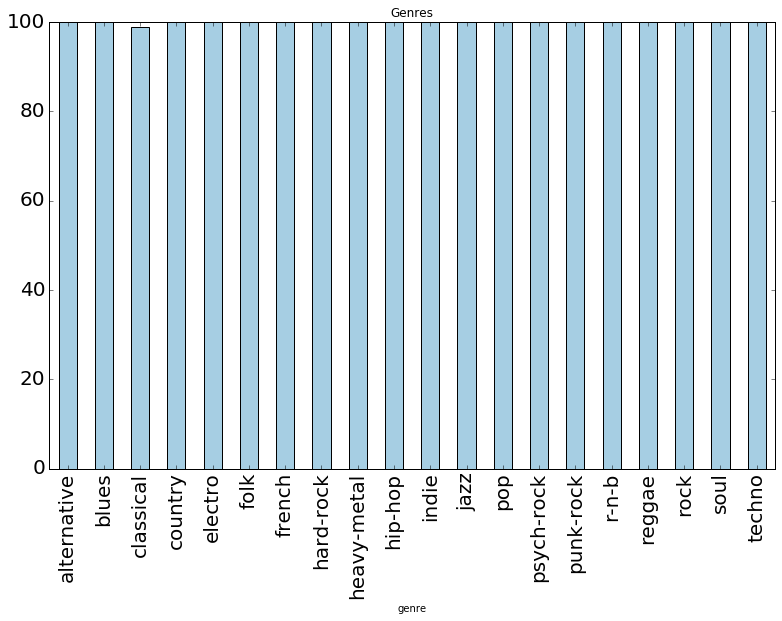

In [3]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [4]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

#Multinomial Target Variable
GENRES = ['alternative','blues','classical','country','electro','folk','french','hard-rock','heavy-metal','hip-hop','indie','jazz','pop','psych-rock','punk-rock','r-n-b','reggae','rock','soul','techno']
target_multinomial = []
for i in data['genre']:
    target_multinomial.append(GENRES.index(i))
target_multinomial=np.array(target_multinomial)

Dimension: (1999, 20)
array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])


# Scaled data

In [6]:
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

sc_attributes = scale(attributes)
#print(repr(sc_attributes))

x_train, x_test, y_train, y_test = train_test_split(sc_attributes, target_multinomial, train_size=0.67, random_state=1)

# Plot Confusion Matrix

In [7]:
#SOURCE: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (13,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, 3)
    #    print("Normalized confusion matrix")
    else:
        pass
    #    print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Logistic Regression

[0.31969999999999998, 0.34520000000000001, 0.34770000000000001, 0.34920000000000001, 0.35220000000000001, 0.35220000000000001]


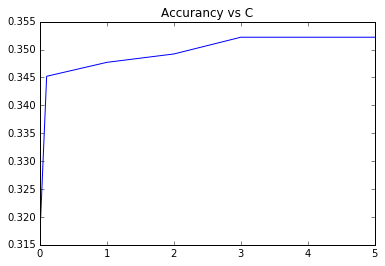

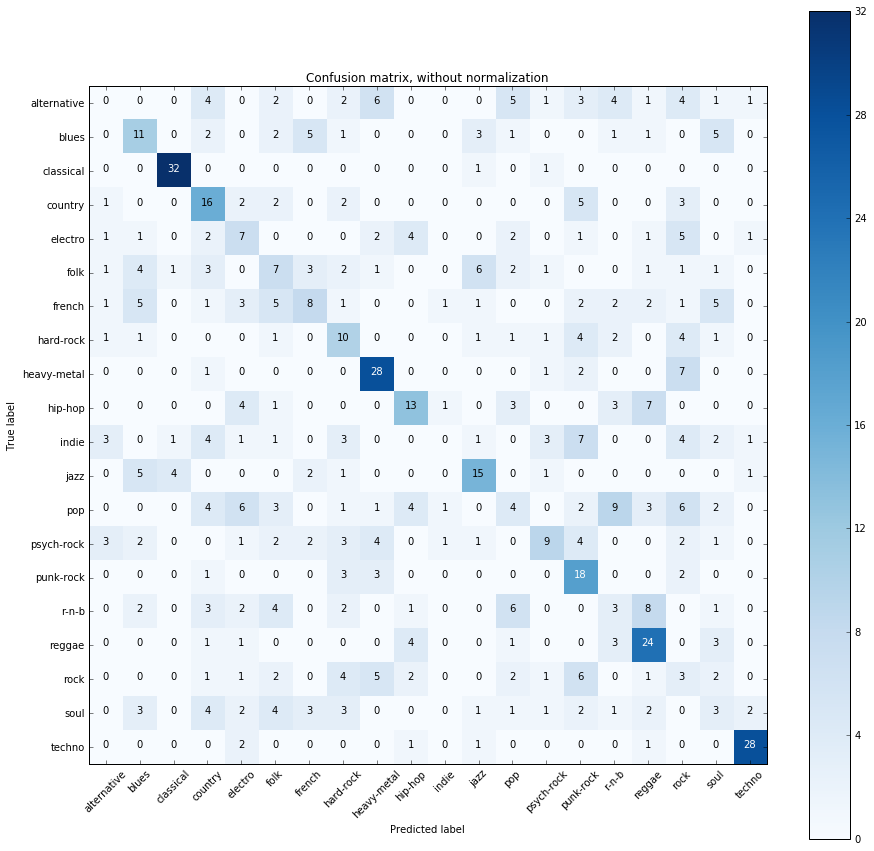

In [8]:
from sklearn.linear_model import LogisticRegression

lr_models =[]
Cs = [0.01,0.1,1,2,3,5]
for c in Cs:
    lr_models.append(LogisticRegression(C=c, multi_class='multinomial', solver='newton-cg'))

acc_scores_c=[]
for model in lr_models:
    acc_scores = cross_val_score(model, sc_attributes, target_multinomial,cv=5)
    acc_scores_c.append(np.around(np.mean(acc_scores),4))

plt.plot(Cs,acc_scores_c)
plt.title('Accurancy vs C')
print(acc_scores_c)

lr_fitted = lr_models[4].fit(x_train,y_train) #model with C=3

y_pred_lr = lr_fitted.predict(x_test)

cnf_lr = confusion_matrix(y_test, y_pred_lr)

plot_confusion_matrix(cnf_lr, classes=GENRES,
                      title='Confusion matrix, without normalization')
#plot_confusion_matrix(cnf_lr, classes=GENRES, normalize=True, title='Normalized confusion matrix')

# Decision Tree

Averaged Decision Tree Accuracy: 0.252150753769


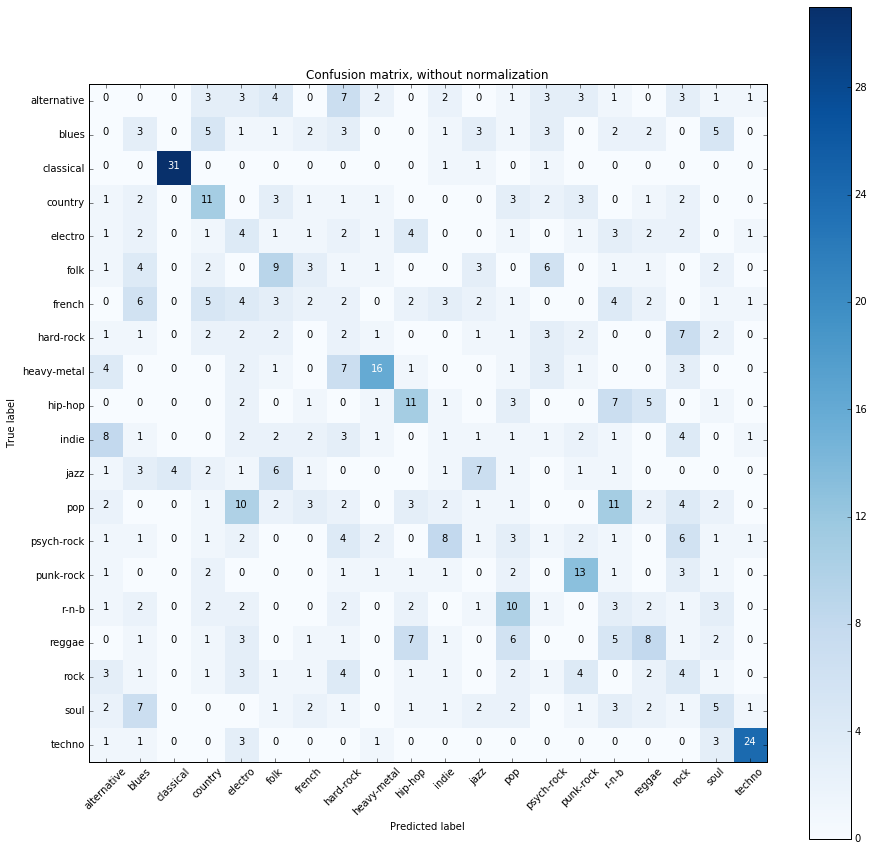

In [9]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

tree_acc_scores = cross_val_score(tree_model, sc_attributes, target_multinomial,cv=10)
avg_tree_acc = np.mean(tree_acc_scores)
print("Averaged Decision Tree Accuracy: " + str(avg_tree_acc))

tree_fitted = tree_model.fit(x_train, y_train)

y_pred_tree = tree_fitted.predict(x_test)

cnf_tree = confusion_matrix(y_test, y_pred_tree)

plot_confusion_matrix(cnf_tree, classes=GENRES,
                      title='Confusion matrix, without normalization')

# Naïve Bayes

Averaged Naïve Bayes Accuracy: 0.252150753769


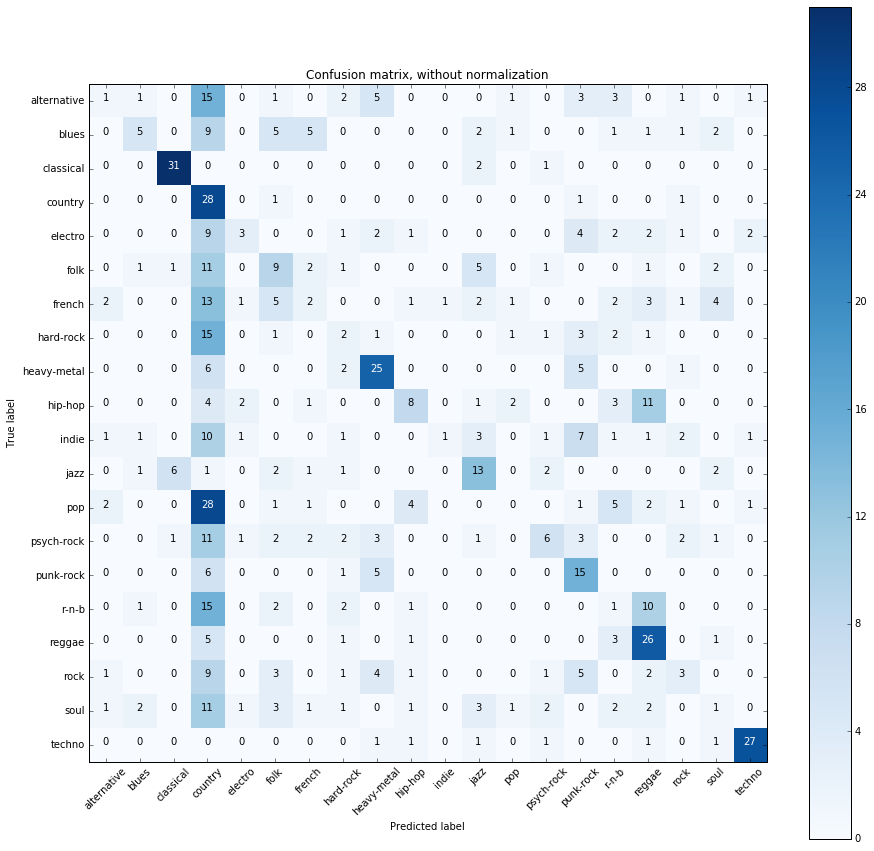

In [10]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
cross_val_score(NB_model, sc_attributes, target_multinomial,cv=10)

avg_NB_acc = np.mean(tree_acc_scores)
print("Averaged Naïve Bayes Accuracy: " + str(avg_NB_acc))

NB_fitted = NB_model.fit(x_train, y_train)

y_pred_NB = NB_fitted.predict(x_test)

cnf_NB = confusion_matrix(y_test, y_pred_NB)

plot_confusion_matrix(cnf_NB, classes=GENRES,
                      title='Confusion matrix, without normalization')

